In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('UpdatedStudentsPerformance.csv')
df.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
5,female,group B,associate's degree,standard,none,71.0,83.0,78.0
6,female,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0


### About Dataset

The data set contains academic data of students from different streams and different levels of education. It displays marks of students in 3 categories:

    1. Math Score
    2. Reading Score
    3. Writing Score

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   990 non-null    float64
 6   reading score                985 non-null    float64
 7   writing score                989 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


### Treatment of missing values
The missing values will be replaced by the method of: Imputation by mean. Using this approach, we compute the mean of a column’s non-missing values, and then replace the missing values in each column separately and independently of the others.

In [57]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

In [58]:
np.count_nonzero(df.isnull())

36

In [61]:
df['math score'] = df['math score'].replace(np.NaN, df['math score'].mean())
df['reading score'] = df['reading score'].replace(np.NaN, df['reading score'].mean())
df['writing score'] = df['writing score'].replace(np.NaN, df['writing score'].mean())

In [62]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Part 2 : Detecting Outliers (Z-score)

Z-score is just the number of standard deviations away from the mean that a certain data point is. Hence, if z-score comes out to be greater than the threshold of 3, the point is considered an outlier and removed.

In [63]:
print("Mean of math score : ", np.mean(df['math score']))
print("Mean of reading score : ", np.mean(df['reading score']))
print("Mean of writing score : ", np.mean(df['writing score']))

Mean of math score :  66.20808080808081
Mean of reading score :  68.14256825075834
Mean of writing score :  68.14256825075834


In [64]:
print("Median of math score : ",np.median(df['math score']))
print("Median of reading score : ",np.median(df['reading score']))
print("Median of writing score : ",np.median(df['writing score']))

Median of math score :  66.1040404040404
Median of reading score :  69.0
Median of writing score :  69.0


Text(0.5, 1.0, 'Math scores of students')

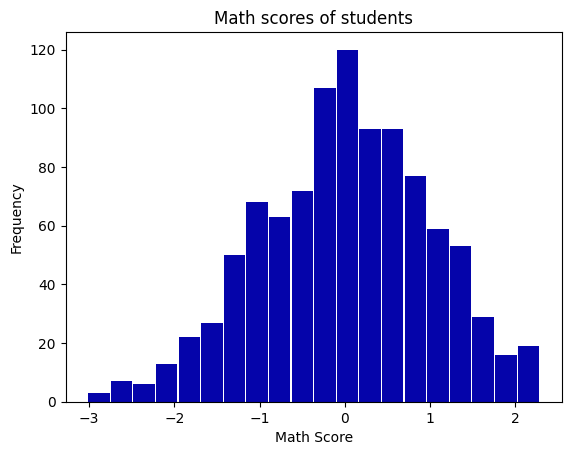

In [75]:
n, bins, patches = plt.hist(x=df['math score'], bins='auto', color='#0504aa', rwidth=0.95)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math scores of students')

In [66]:
outliers = []
def detectOutliers(df) :
    threshold = 3
    mean = np.mean(df['math score'])
    std = np.std(df['math score'])
    
    for i in df['math score'] :
        z_score = (i - mean)/std;
        if np.abs(z_score) > threshold :
            outliers.append(i)
    return outliers

In [67]:
m = detectOutliers(df)
print(m, df.shape)

[0.0, 19.0, 8.0] (1000, 8)


In [68]:
indexAge = df[df['math score'].isin(m)].index
df.drop(indexAge, inplace=True)
df.shape

(997, 8)

Hence, 5 outliers based on math score have been removed using z-score.

### Part 3 : Scaling data : To change scale for better understanding
Data Scaling is a data preprocessing step for numerical features. Data scaling is required to produce good results from . Various scalers are defined for this purpose like min-max scaler, standard scaler and robust scaler

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_data = ['math score', 'reading score', 'writing score']
model = scaler.fit(df[numeric_data])
df[numeric_data] = model.transform(df[numeric_data])
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.641026,0.694118,0.694118
1,female,group C,some college,standard,completed,0.602564,0.858824,0.858824
2,female,group B,master's degree,standard,none,0.871795,0.917647,0.917647
3,male,group A,associate's degree,free/reduced,none,0.320513,0.341176,0.341176
4,male,group C,some college,standard,none,0.692308,0.705882,0.705882
5,female,group B,associate's degree,standard,none,0.628205,0.741176,0.741176
6,female,group B,some college,standard,completed,0.846154,0.905882,0.905882
7,male,group B,some college,free/reduced,none,0.230769,0.282353,0.282353
8,male,group D,high school,free/reduced,completed,0.538462,0.611765,0.611765
9,female,group B,high school,free/reduced,none,0.205128,0.411765,0.411765


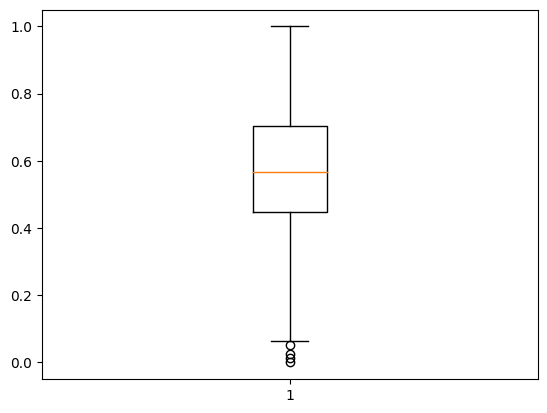

In [70]:
plt.boxplot(df['math score'])
plt.show()

### Checking skewness and using standard scaler

In [71]:
df[numeric_data].skew()

math score      -0.132641
reading score   -0.234754
writing score   -0.234754
dtype: float64

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_data = ['math score', 'reading score', 'writing score']
model = scaler.fit(df[numeric_data])
df[numeric_data] = model.transform(df[numeric_data])
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.382172,0.383581,0.383581
1,female,group C,some college,standard,completed,0.178158,1.322812,1.322812
2,female,group B,master's degree,standard,none,1.606260,1.658251,1.658251
3,male,group A,associate's degree,free/reduced,none,-1.317949,-1.629057,-1.629057
4,male,group C,some college,standard,none,0.654192,0.450669,0.450669
5,female,group B,associate's degree,standard,none,0.314167,0.651933,0.651933
6,female,group B,some college,standard,completed,1.470250,1.591163,1.591163
7,male,group B,some college,free/reduced,none,-1.793984,-1.964496,-1.964496
8,male,group D,high school,free/reduced,completed,-0.161867,-0.086035,-0.086035
9,female,group B,high school,free/reduced,none,-1.929993,-1.226529,-1.226529


array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

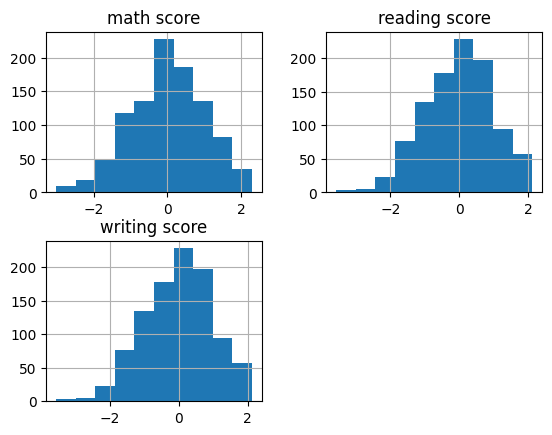

In [73]:
df[numeric_data].hist()